Epoch 1/10
538/538 [==============================] - 12s 18ms/step - loss: 0.4257 - accuracy: 0.8338
Epoch 2/10
538/538 [==============================] - 9s 17ms/step - loss: 0.4537 - accuracy: 0.7926
Epoch 3/10
538/538 [==============================] - 9s 18ms/step - loss: 0.4438 - accuracy: 0.7957
Epoch 4/10
538/538 [==============================] - 9s 17ms/step - loss: 0.4342 - accuracy: 0.8429
Epoch 5/10
538/538 [==============================] - 9s 18ms/step - loss: 0.1302 - accuracy: 0.9576
Epoch 6/10
538/538 [==============================] - 9s 18ms/step - loss: 0.0288 - accuracy: 0.9926
Epoch 7/10
538/538 [==============================] - 10s 18ms/step - loss: 0.0204 - accuracy: 0.9949
Epoch 8/10
538/538 [==============================] - 10s 18ms/step - loss: 0.0098 - accuracy: 0.9981
Epoch 9/10
538/538 [==============================] - 9s 17ms/step - loss: 0.0093 - accuracy: 0.9984
Epoch 10/10
68/68 [==============================] - 1s 5ms/step
!!!!!!!!!!!!!!!!!!!!!!!

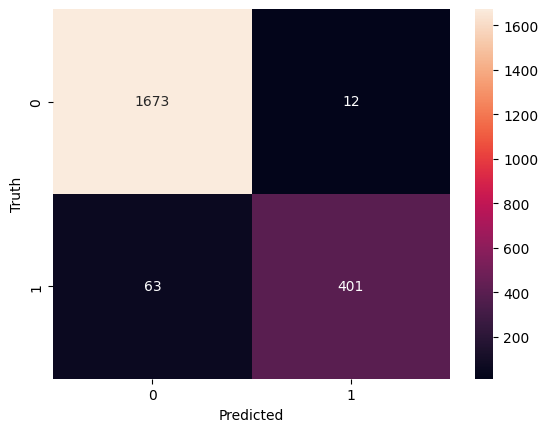

In [8]:
import re
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import tokenizer_from_json

def preprocess_text(text):
    # Preprocess the input text
    text = re.sub(r'\W', ' ', str(text))  # Remove non-alphanumeric characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # Remove single characters
    text = re.sub(r'\s+', ' ', text).lower()  # Convert to lowercase and remove extra spaces
    return text

def predict_spam(text):
    # Load the saved tokenizer
    with open('tokenizer.json', 'r') as f:
        tokenizer = tokenizer_from_json(f.read())

    # Preprocess the input text
    preprocessed_text = preprocess_text(text)

    # Tokenize and pad the preprocessed text
    sequences = tokenizer.texts_to_sequences([preprocessed_text])
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

    # Load the saved model
    model = load_model('LSTM_spam_classifier_model.h5')

    # Perform prediction
    predicted_prob = model.predict(padded_sequences)[0][0]
    predicted_label = "spam" if predicted_prob > 0.5 else "ham"

    return predicted_label, predicted_prob

# Load the dataset
df = pd.read_csv("spam.csv")
df['spam'] = df['labels'].apply(lambda x: 1 if x == 'spam' else 0)

# Clean the dataset
df['text'] = df['Text'].apply(lambda x: re.sub(r'\W', ' ', str(x)))  # Remove non-alphanumeric characters
df['text'] = df['text'].apply(lambda x: re.sub(r'\s+[a-zA-Z]\s+', ' ', x))  # Remove single characters
df['text'] = df['text'].apply(lambda x: re.sub(r'\s+', ' ', x).lower())  # Convert to lowercase and remove extra spaces

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['spam'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Save the tokenizer
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w') as f:
    f.write(tokenizer_json)

vocab_size = len(tokenizer.word_index) + 1
max_length = 100

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')

X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

# Build the LSTM model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16)

######################
# New Evaluate the model
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
y_predicted = np.where(y_predicted > 0.5, 1, 0)

print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
print("\n model \n",classification_report(y_test, y_predicted))
cm = confusion_matrix(y_test, y_predicted)  # pylint: disable=invalid-name
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Save the model
model.save('LSTM_spam_classifier_model.h5')


In [1]:
##################   Prediction    ######################
import re
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import tokenizer_from_json

def preprocess_text(text):
    # Preprocess the input text
    text = re.sub(r'\W', ' ', str(text))  # Remove non-alphanumeric characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # Remove single characters
    text = re.sub(r'\s+', ' ', text).lower()  # Convert to lowercase and remove extra spaces
    return text

def predict_spam(text):
    # Load the saved tokenizer
    with open('tokenizer.json', 'r') as f:
        tokenizer = tokenizer_from_json(f.read())

    # Preprocess the input text
    preprocessed_text = preprocess_text(text)

    # Tokenize and pad the preprocessed text
    sequences = tokenizer.texts_to_sequences([preprocessed_text])
    
    padded_sequences = pad_sequences(sequences, maxlen=100, padding='post')

    # Load the saved model
    model = load_model('LSTM_spam_classifier_model.h5')

    # Perform prediction
    predicted_prob = model.predict(padded_sequences)[0][0]
    predicted_label = "spam" if predicted_prob > 0.5 else "ham"

    return predicted_label, predicted_prob

# Example usage
text = "Congratulations! You have won a prize. Reply to claim it."
predicted_label, predicted_prob = predict_spam(text)
print("Predicted Label:", predicted_label)
print("Predicted Probability:", predicted_prob)


1/1 [==============================] - 2s 2s/step
Predicted Label: spam
Predicted Probability: 0.9999496


In [4]:
# Example usage
text = "Subject: photoshop , windows , office . cheap . main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin"
# text = "Subject: please process immediately to avoid loss of information read very carefully your migration date is : today ! ! please make sure you are connected to the network before you launch this application . click the button only once ! if a pop - up box appears , prompting you to "" abort , cancel or trust signer please select trust signer . this box may appear multiple times . please select trust signer for every instance . please note : you will not notice any change to your existing personal address book , journal entries , private folder structure or calendar after running this application . any information you add to your personal address book , journal entries or calendar after you process this tool will need to be manually imported into outlook after you are migrated . failure to run this application will result in your data not being imported to outlook . thank you for your cooperation , outlook 2000 migration team"

predicted_label, predicted_prob = predict_spam(text)
print("Predicted Label:", predicted_label)
print("Predicted Probability:", predicted_prob)


1/1 [==============================] - 1s 521ms/step
Predicted Label: spam
Predicted Probability: 0.99995995
